In [1]:
import sys
import os
import numpy as np
from collections import Counter
from gensim.models import KeyedVectors
from common.space import Space
from image.encoder import ImageEncoder
from text.encoder import TextEncoder
from text.summarizer import NewsSummarizer
from config import w2v_file, vocab_limit
from config import google_open_images_folder
from config import get_logger

# sys.path.append(os.path.join(sys.path[0],'image','captioning')) # add models.py

In [2]:
keyed_vectors = KeyedVectors.load_word2vec_format(w2v_file, limit=vocab_limit, binary=True)
space = Space(keyed_vectors)

2019-12-25 11:07:43,052 gensim.models.utils_any2vec: INFO loading projection weights from ~/Downloads/GoogleNews-vectors-negative300.bin.gz
2019-12-25 11:08:28,969 gensim.models.utils_any2vec: INFO loaded (1000000, 300) matrix from ~/Downloads/GoogleNews-vectors-negative300.bin.gz


In [3]:
keywords1 = Counter(['king'])
keywords2 = Counter(['king'])

In [4]:
ss1 = space.create_subspace(keywords=keywords1, dims=5)
ss2 = space.create_subspace(keywords=keywords2, dims=5)

In [5]:
space.subspaces_similarity(ss1, ss2)

1.0

In [6]:
image_encoder = ImageEncoder(space=space)
text_encoder = TextEncoder(space=space)

In [7]:
def test_subspace_from_image(image_filename: str):
    captions: list = image_encoder._get_captions(image_filename)
    print(captions)
    keywords: Counter = image_encoder._get_keywords(captions)
    print(keywords)
    word_subspace = image_encoder.create_subspace(image_filename)
    return word_subspace

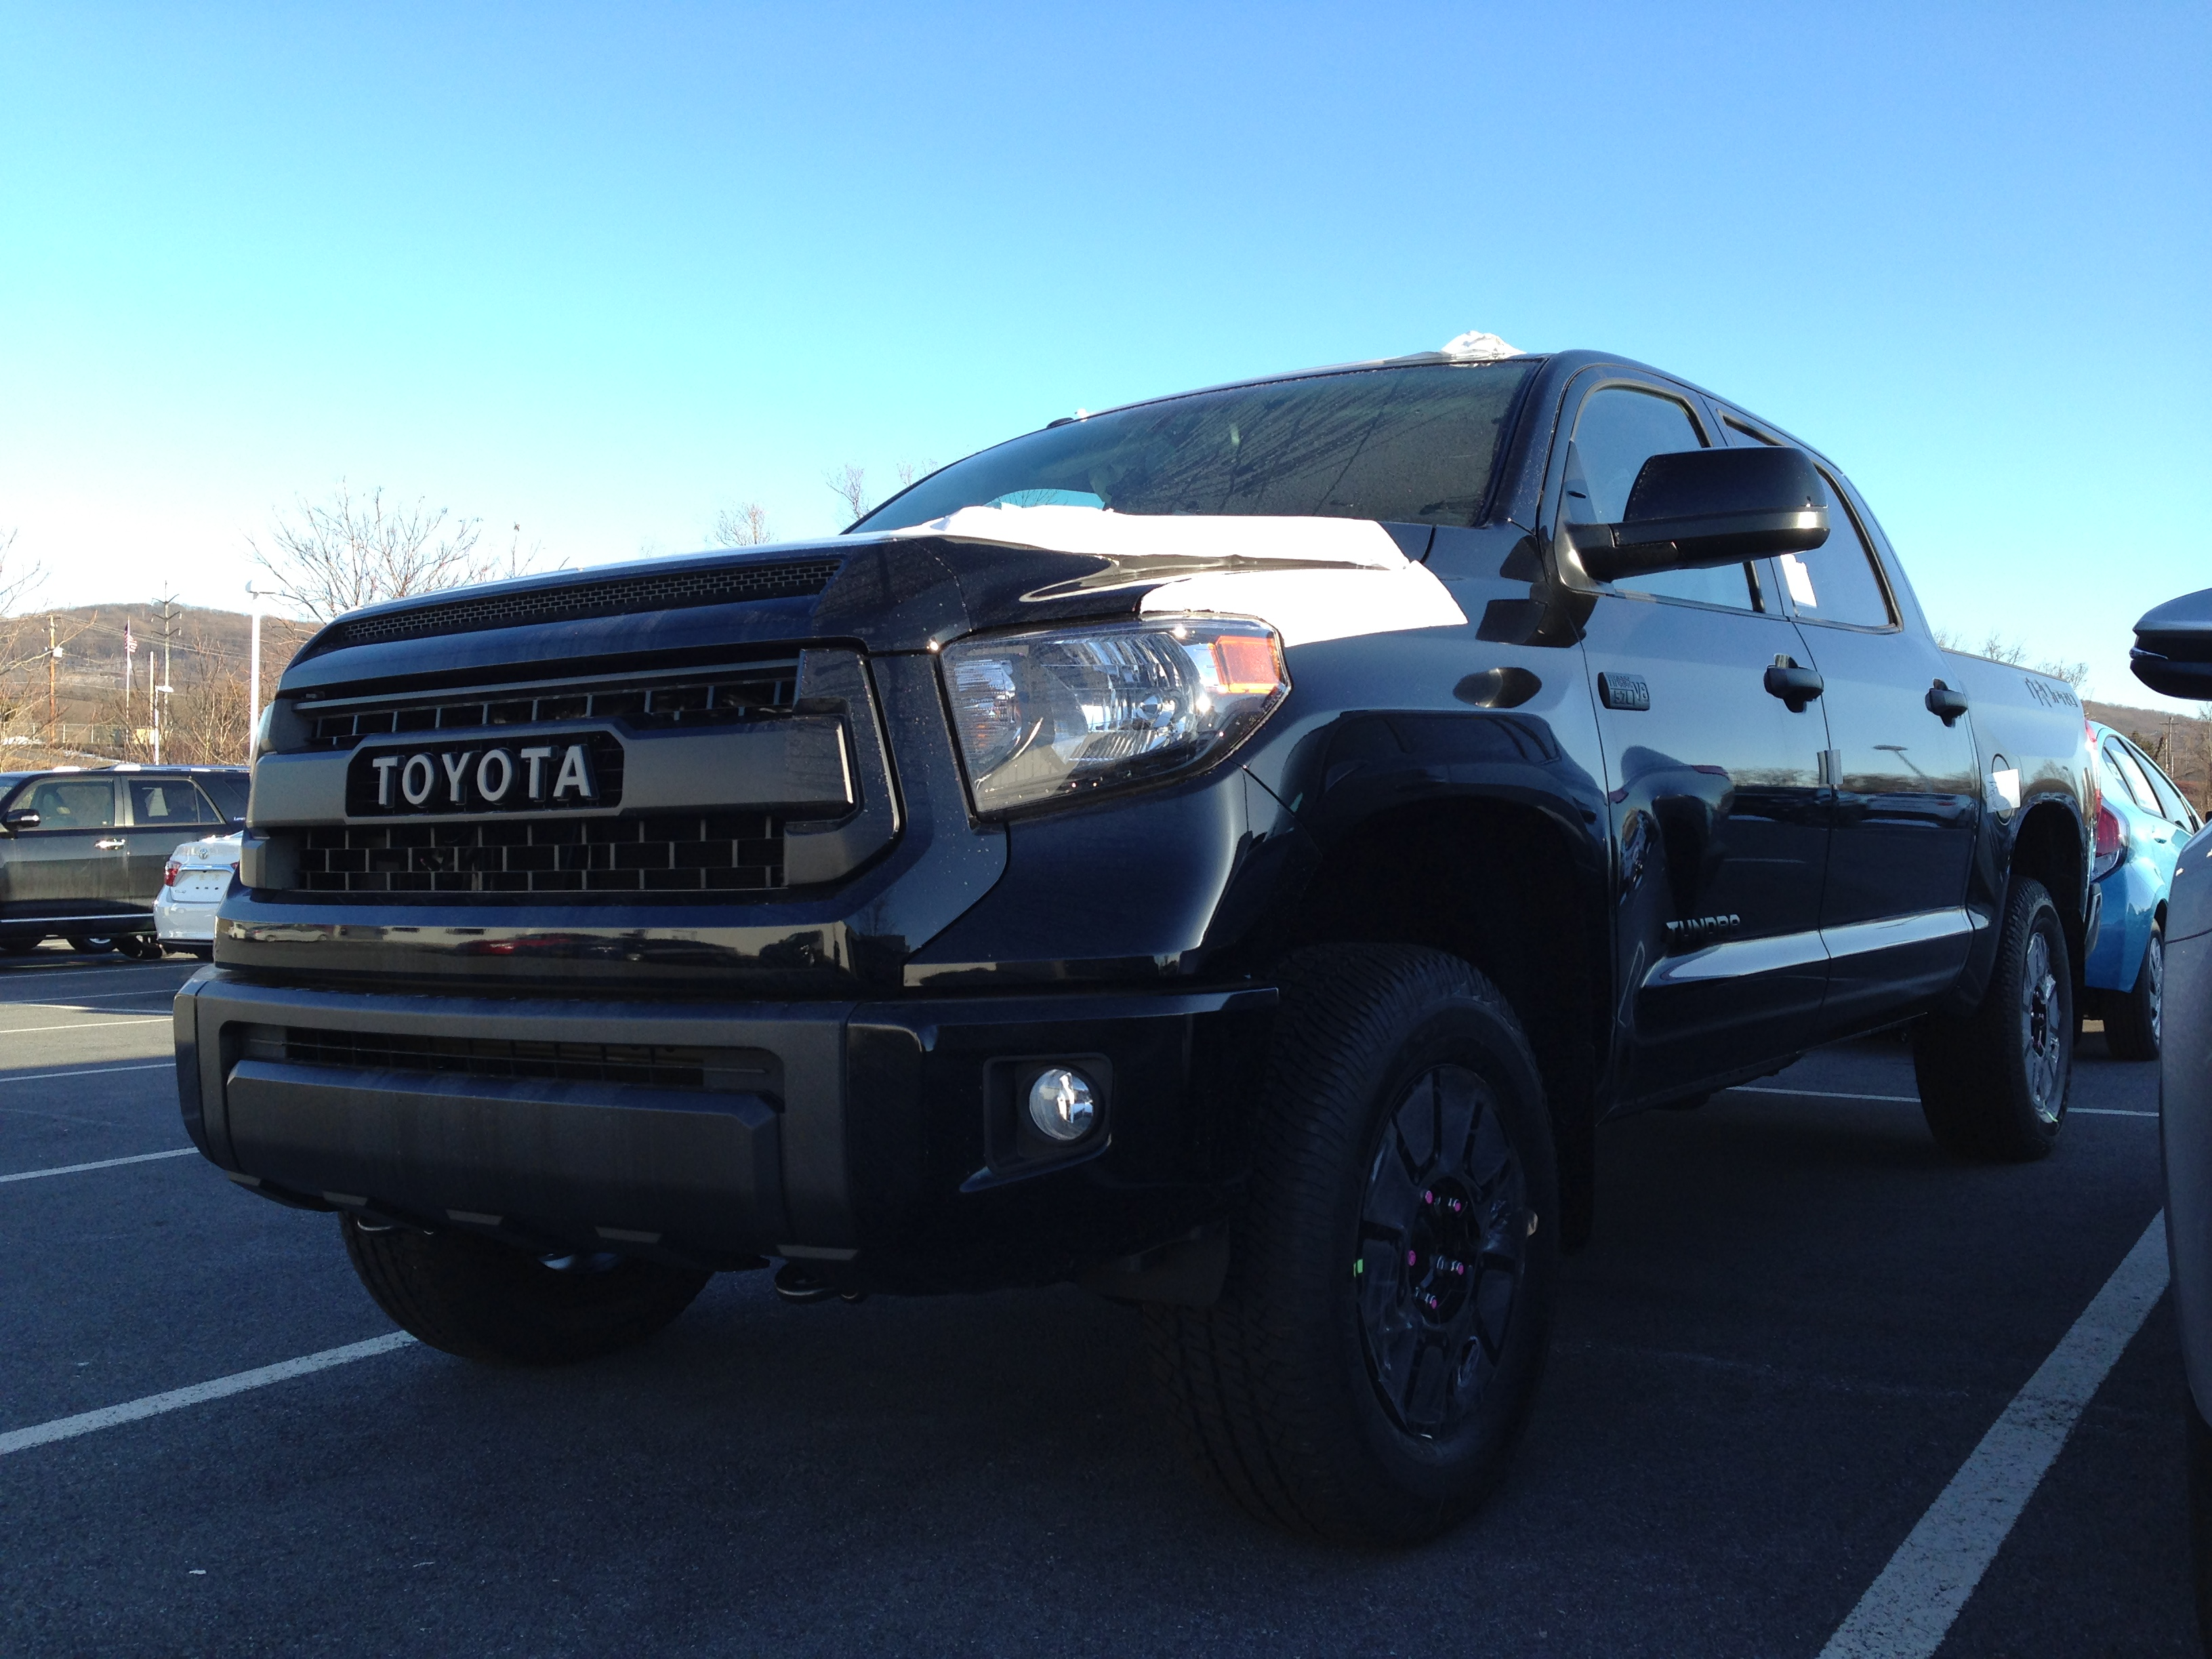

In [9]:
from random import randint
from IPython.display import Image as ImageOpener, display
r = randint(0, 10)
image_filename = os.path.join(google_open_images_folder, os.listdir(google_open_images_folder)[r])
display(ImageOpener(image_filename))

In [10]:
ws = test_subspace_from_image(image_filename)

['a man standing next to a blue truck', 'a man standing next to a blue truck', 'a man standing next to a blue truck', 'a man standing next to a blue truck', 'a man standing next to a blue truck']
Counter({'stand': 1, 'truck': 1, 'man': 1, 'blue': 1})


In [21]:
k = Counter({'truck': 1, 'man': 1, 'black':1})
ws_t = space.create_subspace(keywords=k, dims=5)

In [22]:
space.subspaces_similarity(ws_t, ws)

0.5249355